<a href="https://colab.research.google.com/github/GITGENome/sein/blob/main/P3_sein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Premier analysis

##download

In [2]:
import pandas as pd
df_sein = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/cancer_breast.csv')

##description

In [ ]:
pd.set_option("display.max_column", 111)

In [ ]:
def description(df):
  display(df.info())
  display(df.head())
  display(df.tail())
  display(df.describe())

description(df_sein)

In [ ]:

def val_coun(df):
  for col in df.columns:
    print(f'for {col} there are such values \n{df[col].value_counts()}')

val_coun(df_sein)

In [ ]:
df_sein.duplicated('id').sum()

In [3]:
df_sein.drop(columns=['Unnamed: 32'], inplace=True)

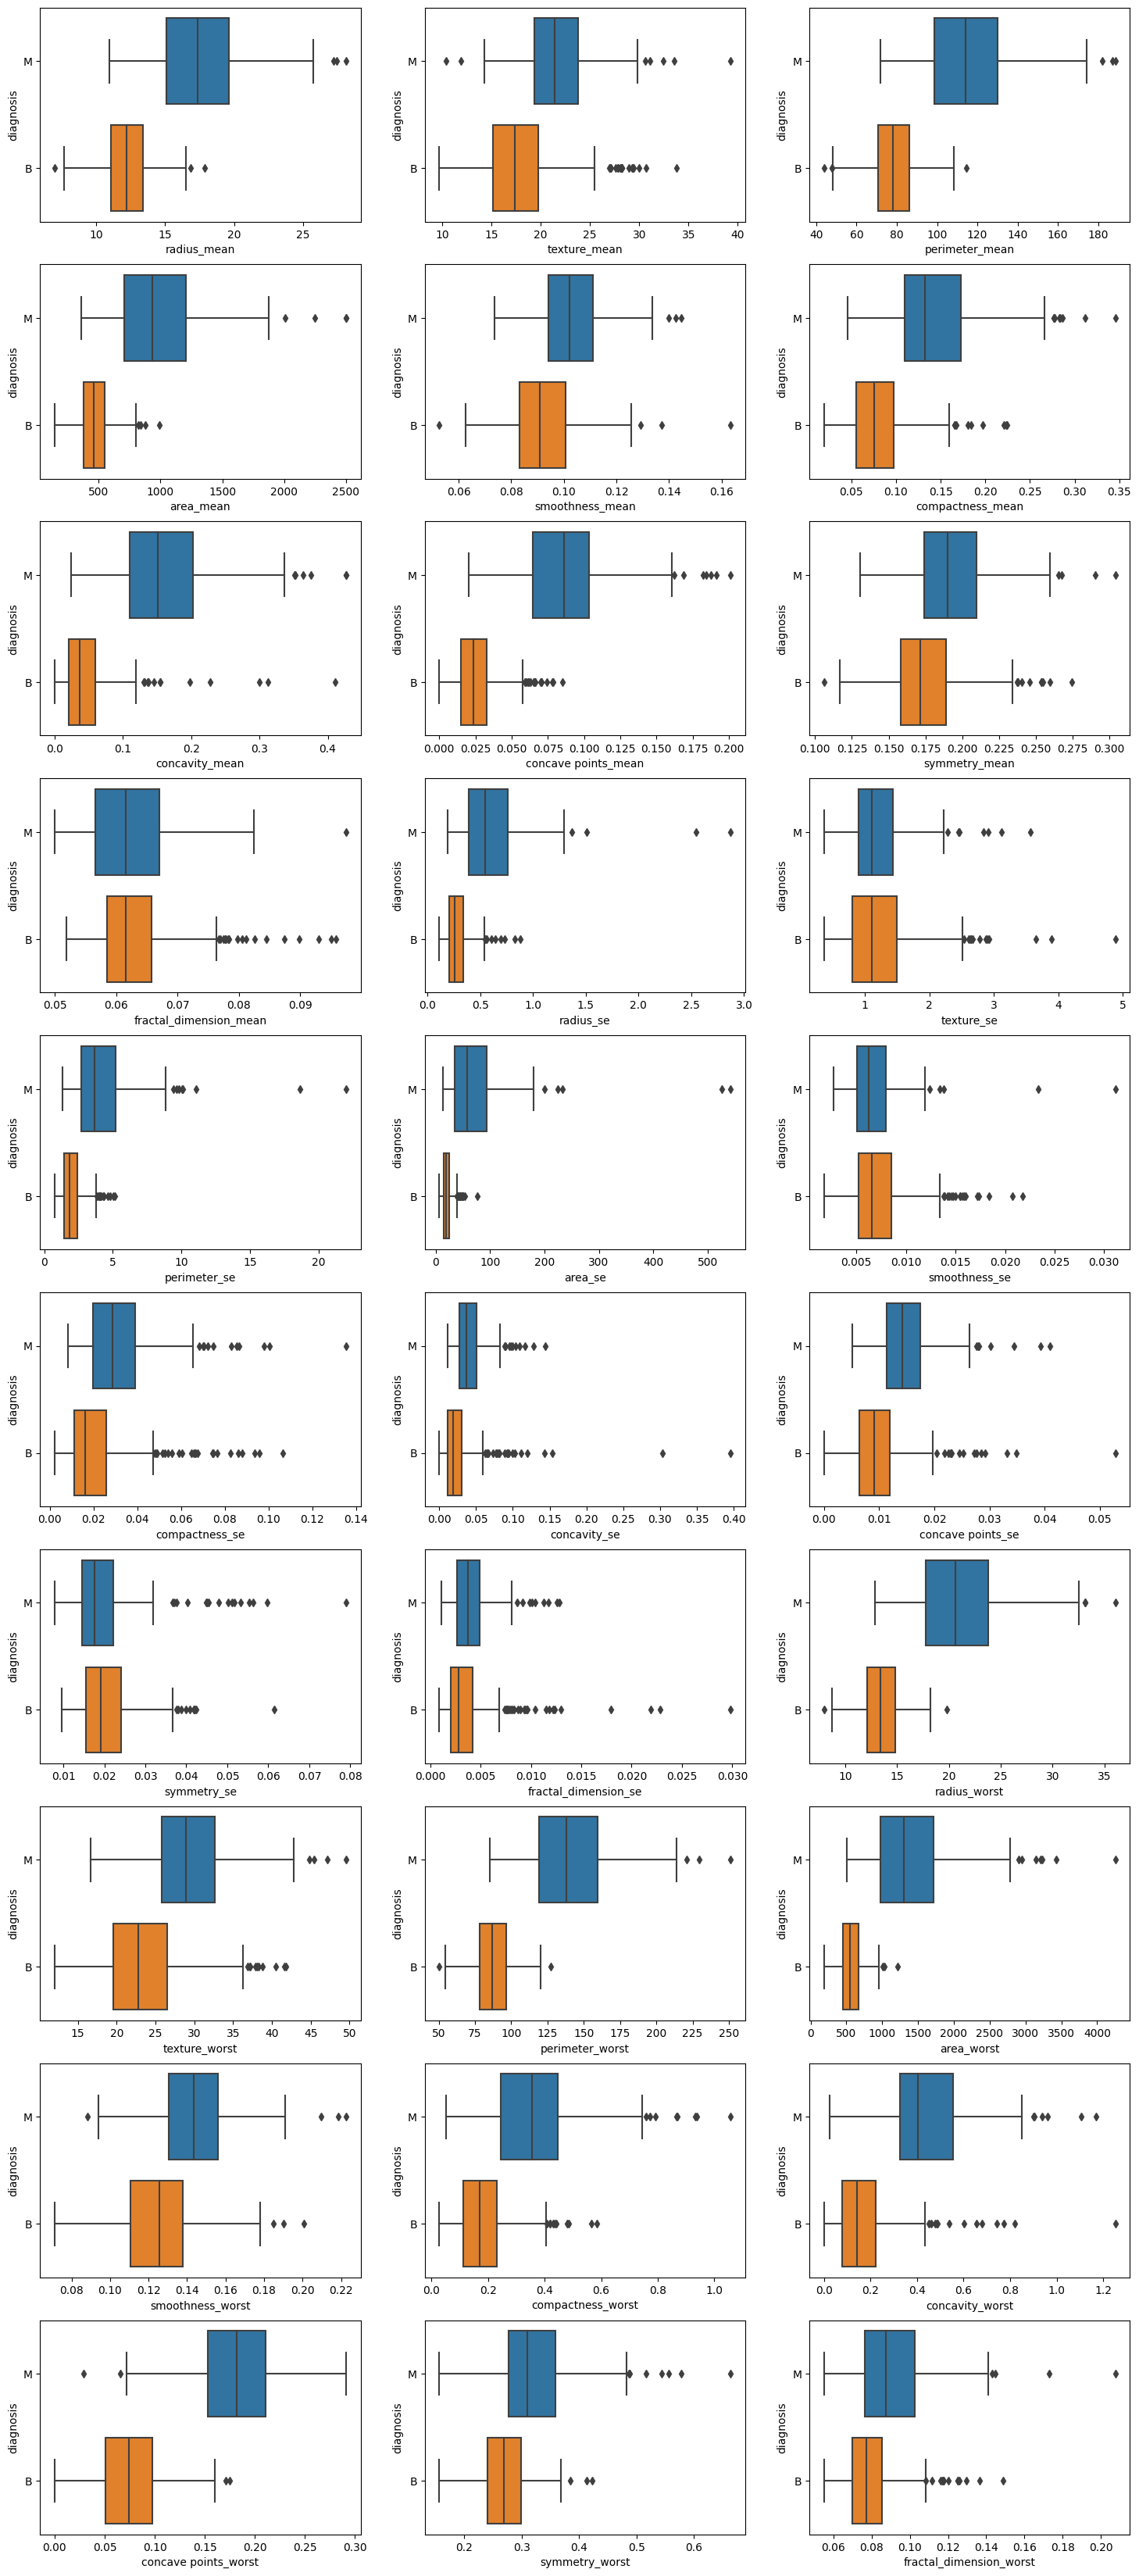

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(18, 42))
count = 2
for row in range(10):
  col_ind = 0
  for col in df_sein.columns[count:count+3]:
    sns.boxplot(df_sein, x= df_sein[col],  y='diagnosis', ax = axs[row,col_ind])#.set_title(col)
    #sns.boxplot(df_sein[df_sein['diagnosis']=='B'], x= df_sein[col], ax = axs[row,col_ind], color='green').set_title(col)

    col_ind+=1
  count+= 3

plt.show()

Search of outliers

In [5]:
df_sein[df_sein['perimeter_mean']>180]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
180,873592,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,8810703,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
461,911296202,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427


In [6]:
df_sein[df_sein['smoothness_mean']>0.15]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
504,915186,B,9.268,12.87,61.49,248.7,0.1634,0.2239,0.0973,0.05252,...,10.28,16.38,69.05,300.2,0.1902,0.3441,0.2099,0.1025,0.3038,0.1252


# lineplot with error bars
# distplot
# pairplot
# anova
normal distribution
chi-square (categoric values)
pca/ clusterisation



In [8]:
df_sein

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: >

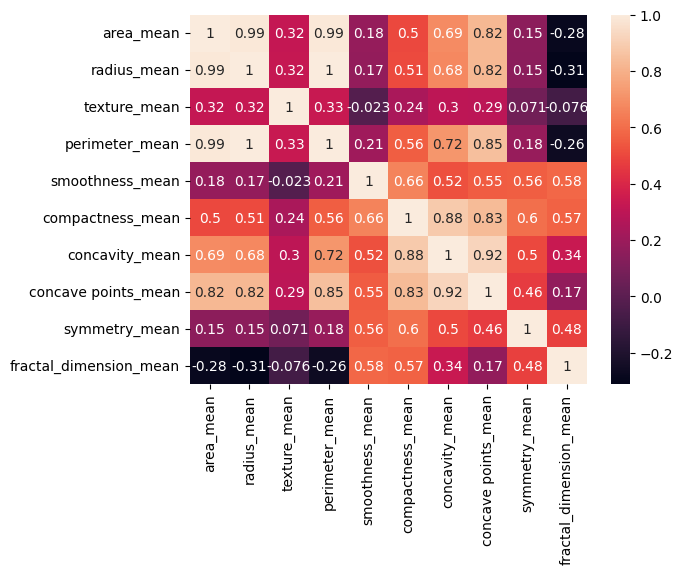

In [43]:
sns.heatmap(df_sein[['area_mean', 'radius_mean', 'texture_mean', 'perimeter_mean','smoothness_mean', 'compactness_mean', 'concavity_mean',  'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].corr(), annot=True)

In [44]:
df_sein['area_mean_min'] = df_sein[['area_mean', 'area_se']].apply(lambda x: x[0]-x[1], axis=1)
df_sein['area_mean_min'] = df_sein[['area_mean', 'area_se']].apply(lambda x: x[0]+x[1], axis=1)

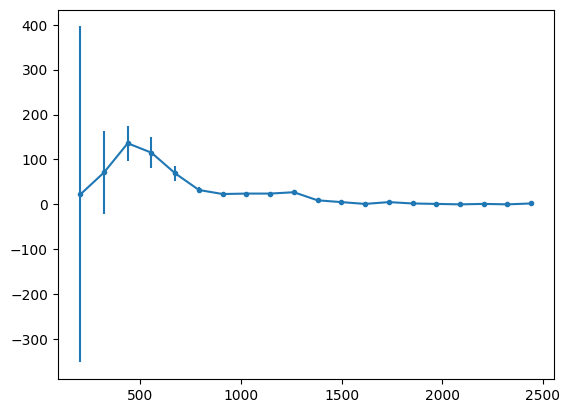